# 실습_환경설정

print(tf.__version__) : 2.4.0

print(np.__version__): 1.21.5

python = 3.7.6

pip install --ignore-install --upgrade tensorflow==2.4.0

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
# import keras
from tensorflow import keras 
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import time

# MNIST 데이터 이미지 확인

MNIST 데이터는 딥러닝 공부를 시작할 때 항상 나오는 'Hello, World'와 같은 존재입니다.

인공지능 연구의 권위자 LeCun 교수가 만든 데이터셋으로 60,000개의 training set과 10,000개의 test set 으로 이뤄져 있습니다. 

0~9까지 숫자를 손으로 쓴 70,000개의 작은 숫자 이미지를 모은 데이터 입니다.

미국의 인구 조사국 직원들로 부터 수집한 데이터와 미국의 중학생들로 부터 취합된 데이터가 반반으로 구성되어 있습니다.

<br>

컴퓨터에게 이미지는 픽셀 값을 가진 숫자 배열입니다.

따라서 데이터를 열어보면 60000 * 28 * 28 개의 숫자가 들어있습니다. 

이때 맨 첫번째 숫자인 60000은 이미지의 갯수를 나타내며, 두 번째, 세 번째는 이미지 사이즈 입니다. 마지막 숫자는 컬러 채널의 수를 말합니다. 칼라 이미지의 경우 R,G,B 세 채널을 갖습니다. 그러나 우리 이미지는 흑백이므로 28,28,1이 됩니다.

즉, MNIST 데이터는 28 * 28 픽셀로 이뤄진 이미지가 60,000개 있는 것입니다.



이를 우리가 인식하는 이미지로 확인하려면 matplotlib.pyplot의 imshow 를 사용합니다.



In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images[0].shape

(28, 28)

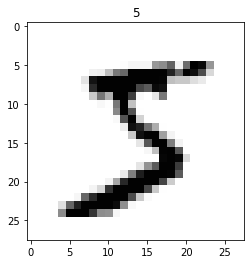

In [10]:
plt.imshow(train_images[0], cmap='Gray')
plt.title(train_labels[0])
plt.show()

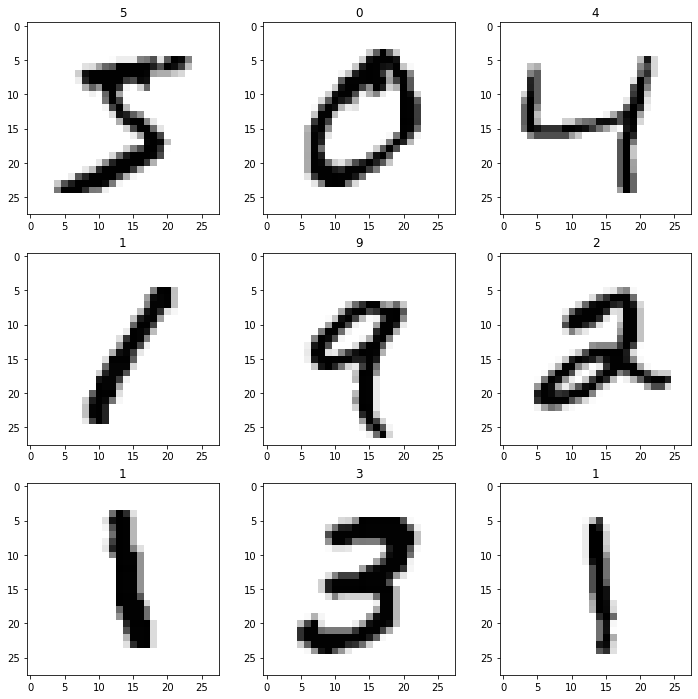

In [5]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title(train_labels[i])
    plt.imshow(train_images[i], cmap='binary')

# 머신러닝을 이용한 분류

머신러닝을 사용해서 MNIST 데이터 분석을 해보겠습니다.

앞서 사용한 Decision Tree Classifier 모델과 RandomForest Classifier 모델을 사용해보겠습니다.

먼저 데이터를 255로 나눠서 정규화를 시키고 분석을 진행합니다.

In [11]:
# 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
# 28*28 2차원으로 이뤄진 데이터를 1차원으로 만들기
train_images = train_images.reshape(60000, -1)
test_images = test_images.reshape(test_images.shape[0],-1)

## decision tree


<div class="alert alert-block alert-warning">
    <b>Quiz> </b> DecisionTree Classifier 모델을 활용해서 5-Fold-Cross Validation 으로 학습을 진행하고 test accuracy를 구해보세요 <br> from sklearn.tree import DecisionTreeClassifier 로 DecisionTree를 사용할 수 있습니다.
</div>

In [76]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [32]:
#지우기..
n=5
kf = KFold(n_splits=n, random_state=42, shuffle=True)
acc_history,test_acc_history = [],[]
for t_idx, v_idx in kf.split(train_images):
    tt = (train_images[t_idx], train_labels[t_idx])
    vv = (train_images[v_idx], train_labels[v_idx])
    
    model = DecisionTreeClassifier(random_state=42,
                                  )
    model.fit(tt[0], tt[1])
    pred = model.predict(vv[0])
    
    acc_history.append(accuracy_score(vv[1], pred))
    
    test_pred = model.predict(test_images)
    test_acc_history.append(accuracy_score(test_labels, test_pred))

In [33]:
acc_history

[0.8680833333333333, 0.8678333333333333, 0.8715, 0.87025, 0.8728333333333333]

In [34]:
test_acc_history

[0.8738, 0.8714, 0.8726, 0.874, 0.8677]

## RandomForest

<div class="alert alert-block alert-warning">
    <b>Quiz> </b> 같은 방식으로 Randomforestclassifier 모델을 활용해서 5-Fold-Cross Validation 으로 학습을 진행하고 test accuracy를 구해보세요 
</div>

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
n=5
kf = KFold(n_splits=n, random_state=42, shuffle=True)
acc_history,test_acc_history = [],[]
for t_idx, v_idx in kf.split(train_images):
    tt = (train_images[t_idx], train_labels[t_idx])
    vv = (train_images[v_idx], train_labels[v_idx])
    
    model = RandomForestClassifier(random_state=42,
                                  )
    model.fit(tt[0], tt[1])
    pred = model.predict(vv[0])
    
    acc_history.append(accuracy_score(vv[1], pred))
    
    test_pred = model.predict(test_images)
    test_acc_history.append(accuracy_score(test_labels, test_pred))
    

In [30]:
acc_history

[0.9681666666666666,
 0.9669166666666666,
 0.9685833333333334,
 0.966,
 0.9661666666666666]

In [31]:
test_acc_history

[0.9677, 0.9676, 0.9673, 0.9681, 0.9672]

# Clustering 방법을 사용한 분류

클러스터링은 개체들이 주어졌을 때, 개체들을 몇 개의 그룹으로 나누는 과정을 말합니다.

clustering(군집화)는 비지도 학습입니다. 따라서 label 에 대한 정보 없이 비슷한 형태를 가진 이미지를 모은다고 생각할 수 있습니다.

같은 그룹내의 개체들 사이는 최대한 가깝게 만들고, 다른 그룹의 개체와의 거리는 최대한 멀게 만드는 것이 목표입니다.

따라서 개체들 사이의 거리를 구하는 방식을 어떻게 할지 정해야 합니다.

주로 사용되는 거리 계산 방식은 `유클리드 거리`입니다.

<b>clustering 기법 종류</b>

- K-means Algorithm
- DBSCAN
- OPTICS
- UMAP

가장 쉽게 많이 쓰이는 k-means 알고리즘을 실습해보겠습니다.

## K-means Algorithm

임의로 선택한 k개의 점을 이용해 초기에 클러스터 k개를 만들고, 클러스터를 알맞게 변화시켜나가면서 클러스터링을 완료하는 방법입니다.

1. k-means는 초기의 k개의 점을 랜덤하게 선택합니다. 선택한 점을 각 클러스터의 centroid로 설정합니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/K_Means_Example_Step_1.svg/1024px-K_Means_Example_Step_1.svg.png"  width="200" >

2. 이후 점들과 centroid 거리를 계산하여 가장 가까운 거리에 있는 클러스터에 해당 점을 추가합니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/K_Means_Example_Step_2.svg/139px-K_Means_Example_Step_2.svg.png" width ="200">

3. 클러스터에 점이 추가되면 다시 centroid 좌표를 계산합니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/K_Means_Example_Step_3.svg/1024px-K_Means_Example_Step_3.svg.png" width="200" >

4. 위의 과정을 반복하여 구한 centroid에 따른 클러스터와 이전에 찾은 클러스터에 차이가 없으면 클러스터링을 종료합니다.

<img src ="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/1024px-K_Means_Example_Step_4.svg.png" width="200">


sklearn에 있는 `KMeans` 함수를 활용해서 클러스터링을 진행하고 시각화를 해보겠습니다.

In [6]:
from sklearn.cluster import KMeans

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
# 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# 28*28 2차원으로 이뤄진 데이터를 1차원으로 만들기
train_images = train_images.reshape(60000, -1)
test_images = test_images.reshape(test_images.shape[0],-1)

In [27]:
#train_images를 dataframe으로 만들어서 활용하겠습니다.
train = pd.DataFrame(train_images)

In [28]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(train)

KMeans(n_clusters=10, random_state=42)

In [30]:
# 결과는 60000개의 array로 출력됩니다.
kmeans.labels_

array([3, 7, 8, ..., 3, 9, 0])

kmeans는 비지도학습이므로 kmeans 결과의 label은 임의로 붙은 숫자일 뿐 의미가 없습니다.

Kmeans에서 같은 영역으로 표시된 결과 일부를 살펴보겠습니다.

In [53]:
train_df = train.copy()
train_df['kmeans']= kmeans.labels_

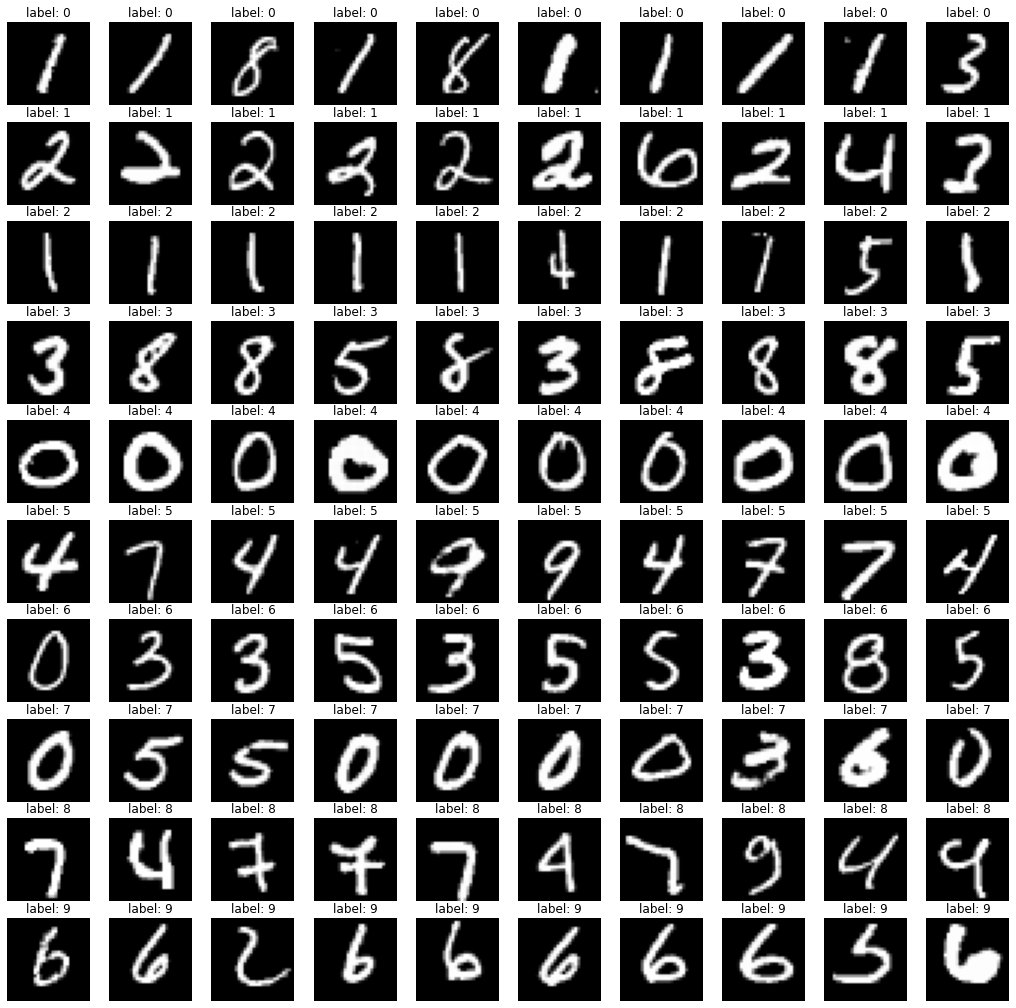

In [75]:
fig, ax = plt.subplots(10,10, figsize=(18,18))
  
for i, ax_ in zip(range(0,10), ax):
    sample = train_df[train_df['kmeans']==i].sample(n=10, replace=False)
    for j, axax in zip(range(0,10), ax_):
        axax.imshow(sample.iloc[j,:-1].values.reshape(28,28), cmap='gray')
        axax.set_title('label: '+str(i))
        axax.axis('off')
plt.show()

고차원의 데이터이기 때문에, Euclidean distance 를 계산하면서 차원의 저주에 빠지기 쉽습니다.

따라서 다른 거리 계산법을 사용해 볼 수도 있지만 이 역시 고차원 데이터에서 크게 성능향상을 보이지 못합니다.

### 차원의 저주(Curse of dimensionality)

차원이 증가할 수록 개별 차원 내에서 학습할 데이터 수가 적어지는 현상을 말합니다. 

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FboSJYB%2FbtraVTqkwC1%2FSyMcbBfsrOozbaoeKQ4ilK%2Fimg.png">
이미지 출처:minye-lee19.gitbook.io


데이터가 충분히 많더라도 차원이 증가하면 각 데이터 사이의 거리가 멀어지고, 밀도가 떨어지는 문제가 발생합니다(sparsity).

정보가 없는 공간이 많아질수록 학습 성능이 떨어지는 단점이 있습니다.



# Keras 를 이용한 deep_learning 실습

## DNN

Deep Neural Network (DNN) 모델을 활용하여 MNIST 데이터를 분석해 보겠습니다.

DNN이란 입력층(input layer)과 출력층(output layer) 사이에 두개 이상의 은닉층(hidden layer)를 가진 학습 방법을 말합니다.

은닉층을 통해 복잡한 비선형 관계를 모델링 할 수 있습니다.


<img src = https://blog.kakaocdn.net/dn/Me6NZ/btqAkybHfbJ/fx5NKmeXgq8nR5XkiStpFK/img.png>



In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

### Keras 모델 만들기 

keras 에서는 Sequential 을 통해 순차적으로 레이어 층을 더할 수 있습니다.

모델 내에 레이어를 어떤 방식으로 쌓을지 설계하는 과정입니다.


In [18]:
model = Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 활성화 함수(Activation Function)

입력된 데이터의 가중 합을 출력 신호로 변환하는 함수 입니다.

활성화 함수도 분석 성능에 영향을 주는 요소이므로 하이퍼파라미터라고 볼 수 있습니다.

<b>많이 쓰이는 활성화 함수</b>

- sigmoid 함수
- ReLU 함수

#### Sigmoid

곡선이 매끄러운 형태로 기울기가 급격하게 변해서 발생하는 Gradient Exploding 현상이 발생하지 않는 장점이 있습니다.


$$Sigmoid\ S(x) = \frac{1}{1+e^{-x}} $$


<b>단점</b>
- 입력값이 아무리 크더라도, 출력되는 범위가 좁아서 경사하강법 수행시 값이 0에 수렴하는 기울기 소실 문제 발생
- 층이 많은 신경망일수록 효과가 누적되어 학습을 어렵게 만듦
- 학습 효율성이 떨어져 학습에 속도가 오래걸림

따라서  은닉층에선 잘 사용하지 않으며 주로 이진 분류의 출력층에서 많이 사용합니다.


<div class="alert alert-block alert-warning">
    위 수식을 참고하여 <b>sigmoid</b> 함수를 구현해보세요.<br>
    자연 상수 e는 numpy의 exp를 활용합니다.
</div>


In [ ]:
def sigmoid(x):
    

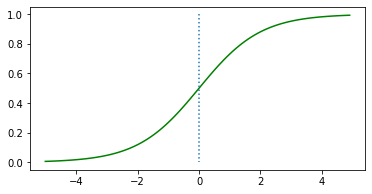

In [47]:
x = np.arange(-5.0,5.0,0.1)
plt.figure(figsize=(6,3))
plt.plot(x, sigmoid(x),'g')
plt.plot([0,0],[1,0], ":")

#### ReLU 함수

시그모이드 함수의 단점을 개선하기 위해 만들어졌습니다.

입력이 양수인 경우, 그대로 통과시키고, 음수인 경우 0으로 만들어줍니다.

기울기 소실 문제가 발생하지 않고, 계산 속도가 빠르고 비용이 적게 드는 장점이 있습니다.

#### Softmax

세 개 이상으로 분류하는 다중 클래스 분류에서 출력층 활성화 함수에 많이 사용됨

분류될 클래스가 n개인 경우, n 차원의 벡터를 입력받아서 각 클래스에 속할 확률을 추정함

$$Softmax\ \sigma ( \vec{z} )_{i} =  \frac{ e^{z_i} }{\sum_{j=1}^K e^{z_j} }  $$

### 모델 컴파일 및 학습 시작

Sequential 내에 레이어를 넣었으면 이를 컴파일하고 학습을 진행해야합니다.

컴파일을 할때는 optimizer와 loss를 꼭 넣어야합니다.

optimizer는 손실 함수를 기반으로 네트워크를 어떻게 업데이트 시킬지 결정하는 것으로 이해할 수 있습니다.

<b>optimizer 종류</b>
- SGD (확률적 경사하강법)
- RMSprop
- Adagrad
- Adadelta
- Adam
- Nadam

[optimizer 참고자료](https://keras.io/ko/optimizers/)

loss는 손실함수를 의미합니다. 입력값과 출력값이 얼마나 일치하는지 평가하는 방식입니다. 간단히 말하면 실제값과 예측값의 차이를 구하는 방식으로 이해할 수 있습니다.


<b>loss 함수 종류</b>
- mean_squared_error
- mean_absolute_error
- mean_absolute_percentage_error
- hinge
- categorical_crossentropy
- sparse_categorical_crossentropy
- cosine_proximity

등 다양합니다.

[loss 참고자료](https://keras.io/ko/losses/)

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 964us/step - loss: 0.4299 - accuracy: 0.8785
Epoch 2/10
1875/1875 [==============================] - 2s 855us/step - loss: 0.1169 - accuracy: 0.9651
Epoch 3/10
1875/1875 [==============================] - 2s 857us/step - loss: 0.0783 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 2s 869us/step - loss: 0.0548 - accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 2s 902us/step - loss: 0.0416 - accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 2s 865us/step - loss: 0.0346 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 2s 880us/step - loss: 0.0246 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 2s 856us/step - loss: 0.0217 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.0156 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 2s 862u

In [21]:
model.evaluate(test_images, test_labels) 

313/313 [==============================] - 0s 1ms/step - loss: 0.0837 - accuracy: 0.9784


[0.08373624831438065, 0.9783999919891357]

### drop out

신경망의 뉴런을 부분적으로 생략하여 모델의 과적합을 해결해주기 위한 방법 중 하나입니다.

각 뉴런이 존재할 확률은 0이 나올 확률이 P인 베르누이 분포를 따릅니다. 

따라서 각 뉴런이 존재할 확률(0 또는 1)에 가중치를 곱해서 존재할 확률이 0인 경우 해당 뉴런이 동작하지 않게 됩니다.

P가 커지면 1이 나올 확률이 올라가기 때문에 dropout을 한 효과가 떨어지게 되며, 반대로 P가 작아지면  dropout을 많이 시키는 것입니다.

<img src="https://t1.daumcdn.net/cfile/tistory/2536663857F247DA11?download">

dropout을 추가하여 모델을 구성하고 학습을 진행해보겠습니다.

In [22]:
model = Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4865 - accuracy: 0.8577
Epoch 2/10
1875/1875 [==============================] - 2s 952us/step - loss: 0.1546 - accuracy: 0.9535
Epoch 3/10
1875/1875 [==============================] - 2s 961us/step - loss: 0.1087 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 2s 944us/step - loss: 0.0864 - accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 2s 950us/step - loss: 0.0726 - accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 2s 942us/step - loss: 0.0634 - accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 2s 953us/step - loss: 0.0590 - accuracy: 0.9816
Epoch 8/10
1875/1875 [==============================] - 2s 923us/step - loss: 0.0493 - accuracy: 0.9838
Epoch 9/10
1875/1875 [==============================] - 2s 944us/step - loss: 0.0450 - accuracy: 0.9852
Epoch 10/10
1875/1875 [==============================] - 2s 928us/

In [24]:
model.evaluate(test_images, test_labels) 

313/313 [==============================] - 0s 977us/step - loss: 0.0703 - accuracy: 0.9797


[0.07026252150535583, 0.9797000288963318]

## CNN

Convolutional Neural Network (CNN)을 찾아보면 흔하게 볼 수 있는 모델 구조 그림입니다.

<img src="https://blog.kakaocdn.net/dn/zELMd/btqCGQAYwRH/XimTTgvdDymHKX4VDImwrK/img.png">

CNN은 이미지 속에서 여러가지 특징들을 찾아서 이미지를 추론하는 모델입니다.

Convolution layer에서 다양한 filter를 통해 이미지의 feature map을 계산하여 특징을 추출합니다.

### 모델 만들기

CNN 모델은 배치(batch) 크기를 제외하고 (이미지 높이, 너비, 컬러 채널) 크기의 텐서를 입력으로 받습니다. 

Conv2D 는 3 * 3 사이즈의 설정한 갯수 만큼의 kernel(filter)를 거쳐 이미지의 특징맵을 추출합니다.

아래 구조는 32개의 kernel를 거치게 되므로 추출된 특징 맵은 32개의 channel를 갖습니다.

이때 추출된 특징 맵은 활성화 함수를 통해 다른 층의 뉴런으로 신호를 전달시킵니다.

[참고 자료_deeplizard](https://deeplizard.com/resource/pavq7noze2)


### Pooling

<b>Pooling</b>은
Convolution을 거쳐서 나온 activation maps이 있을 때, 이를 이루는 convolution layer을 resizing하여 새로운 layer를 얻는 것을 말합니다.

Pooling의 효과는 다음과 같습니다.

1. input size를 줄인다

2. overfitting을 조절 : input size가 줄어드는 것은 그만큼 쓸데없는 parameter의 수가 줄어들기 때문에 과적합을 줄일 수 있습니다.

3. 특징 추출 : pooling을 했을 때, 특정한 모양을 더 잘 인식할 수 있게 됩니다.

4. 지역적 이동에 노이즈를 추가하여 일반화 성능 향상: maxpooling의 경우 주어진 픽셀중 큰것만 뽑기때문에 모양이 조금 달라지는데, 이를 통해 더 robust 한 모델을 만들 수 있습니다.

겹치는 부분 없이 수행하는 경우 28 * 28 사이즈의 이미지가 MaxPooling (2,2)를 거치면 14 * 14 사이즈의 이미지가 나오게 됩니다.
<br><br>

주로 max pooling과 average pooling을 사용합니다.

<img src="https://blog.kakaocdn.net/dn/oWHJ2/btqCIE7YOuS/DHB8ZU0pWwEjPEHJHRhWp1/img.png" height="100">



In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [7]:
#지금까지의 모델 구조를 출력
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 64)          3

### Dense 층 추가

모델을 완성하려면 마지막 합성곱 층의 출력 텐서(크기 (4, 4, 64))를 하나 이상의 Dense 층에 주입하여 분류를 수행합니다. 

Dense 층은 벡터(1D)를 입력으로 받는데 현재 출력은 3D 텐서입니다. 

먼저 `Flatten` 을 활용해서 3D 출력을 1D로 펼치겠습니다. 

그다음 하나 이상의 Dense 층을 그 위에 추가하겠습니다. 

MNIST 데이터는 10개의 클래스가 있으므로 마지막에 Dense 층에 10개의 출력과 소프트맥스 활성화 함수를 사용합니다.

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 64)          3

### 모델 컴파일 및 학습시작

In [20]:
%%time
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0187 - accuracy: 0.9938 - val_loss: 0.0292 - val_accuracy: 0.9903
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0141 - accuracy: 0.9956 - val_loss: 0.0310 - val_accuracy: 0.9913
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.0266 - val_accuracy: 0.9929
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0119 - accuracy: 0.9966 - val_loss: 0.0462 - val_accuracy: 0.9888
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0310 - val_accuracy: 0.9916
Wall time: 1min 2s


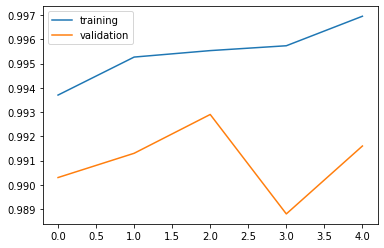

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0310 - accuracy: 0.9916


In [23]:
print(test_acc)

0.991599977016449


### 오답확인

CNN 모델이 오분류한 결과를 확인해보겠습니다.

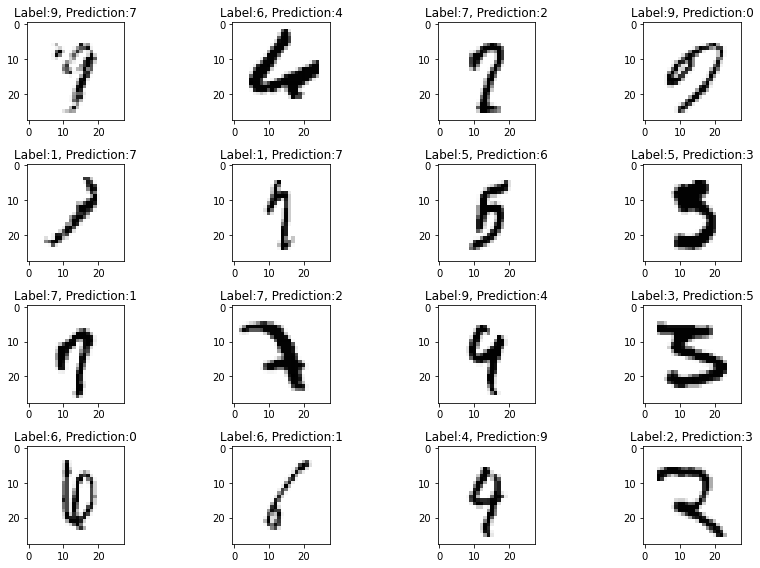

In [26]:
import random

predicted_result = model.predict(test_images)
predicted_labels = np.argmax(predicted_result, axis=1)

# test_labels = np.argmax(test_labels, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(test_images[n].reshape(28, 28), cmap='Gray', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()